In [ ]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Read the data using read_csv method in pandas

articles_df = pd.read_csv("articles_subset.csv")
customers_df = pd.read_csv("customers_subset.csv")
transactions_df = pd.read_csv("transactions_train_subset.csv")

## Understanding the data

In [ ]:
# To get the shapes of the dataframes

print("The shape of articles dataframe is",articles_df.shape)
print("The shape of customers dataframe is",customers_df.shape)
print("The shape of transactions dataframe is",transactions_df.shape)

The shape of articles dataframe is (66842, 25)
The shape of customers dataframe is (34300, 7)
The shape of transactions dataframe is (705313, 5)


In [ ]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,0077ba345ef6aa8781802107df25bbb8a14fdcd04130c3...,534795002,0.011864,1
1,2018-09-20,007ea762fbbebfad288a49f1d8f7c2c0c62b189a8816fa...,610671001,0.013542,1
2,2018-09-20,01cdaf4a8603d1aafd565d05a7e1013d1cca48ab378fa8...,669056002,0.011847,2
3,2018-09-20,01cdaf4a8603d1aafd565d05a7e1013d1cca48ab378fa8...,536162002,0.020322,2
4,2018-09-20,0277917f4faac280023baecd03c3790b951a9403085da1...,686269001,0.016932,2


In [ ]:
# To get the information of the dataframes

print("\n Articles Dataframe\n")
articles_df.info()
print("\nCustomers dataframe\n")
customers_df.info()
print("\nTransactions dataframe\n")
transactions_df.info()


 Articles Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66842 entries, 0 to 66841
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   article_id                    66842 non-null  int64 
 1   product_code                  66842 non-null  int64 
 2   prod_name                     66842 non-null  object
 3   product_type_no               66842 non-null  int64 
 4   product_type_name             66842 non-null  object
 5   product_group_name            66842 non-null  object
 6   graphical_appearance_no       66842 non-null  int64 
 7   graphical_appearance_name     66842 non-null  object
 8   colour_group_code             66842 non-null  int64 
 9   colour_group_name             66842 non-null  object
 10  perceived_colour_value_id     66842 non-null  int64 
 11  perceived_colour_value_name   66842 non-null  object
 12  perceived_colour_master_id    66842 non-null  int64 

In [ ]:
print("\n For articles dataframe\n",articles_df.isnull().sum())
print("\n For customers dataframe\n",customers_df.isnull ().sum ())
print("\n For transactions dataframe\n",transactions_df.isnull().sum())


 For articles dataframe
 article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     238
dtype: int64

 For customers dataframe
 customer_id               0
FN    

## Preparation and transformation of data

In [ ]:
# Left join the transactions_df and articles_df dataframes using article_id as primary key 
articles = articles_df[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_with_trans = transactions_df[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_df, on='article_id', how='left')
articles_with_trans.head()

,customer_id,article_id,price,t_dat,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0077ba345ef6aa8781802107df25bbb8a14fdcd04130c3...,534795002,0.011864,2018-09-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,007ea762fbbebfad288a49f1d8f7c2c0c62b189a8816fa...,610671001,0.013542,2018-09-20,610671.0,Perrie trash,272.0,Trousers,Garment Lower body,1010016.0,...,Trousers,D,Divided,2.0,Divided,53.0,Divided Collection,1009.0,Trousers,"5-pocket, ankle-length jeans in washed stretch..."
2,01cdaf4a8603d1aafd565d05a7e1013d1cca48ab378fa8...,669056002,0.011847,2018-09-20,669056.0,Holly Lace LS,252.0,Sweater,Garment Upper body,1010021.0,...,Tops Fancy Jersey,D,Divided,2.0,Divided,53.0,Divided Collection,1005.0,Jersey Fancy,Lace top with an opening and button at the bac...
3,01cdaf4a8603d1aafd565d05a7e1013d1cca48ab378fa8...,536162002,0.020322,2018-09-20,536162.0,CSP W Viktoria,275.0,Skirt,Garment Lower body,1010016.0,...,Skirt,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1012.0,Skirts,"Short, pleated skirt in woven fabric with elas..."
4,0277917f4faac280023baecd03c3790b951a9403085da1...,686269001,0.016932,2018-09-20,686269.0,Family Hood Ladies,308.0,Hoodie,Garment Upper body,1010014.0,...,Boys Local Relevance,H,Children Sizes 92-140,4.0,Baby/Children,48.0,Kids Local Relevance,1023.0,Special Offers,Top in sweatshirt fabric with a lined drawstri...


## Univariate analysis

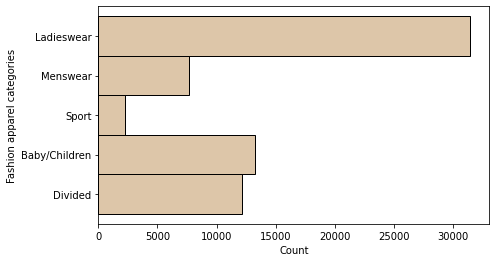

In [ ]:
# Count of different types of fashion apparel categories
f, ax = plt.subplots(figsize = (7,4))
ax = sns.histplot(data=articles_df, y='index_group_name', color='tan')
ax.set_xlabel('Count')
ax.set_ylabel('Fashion apparel categories')
plt.show()

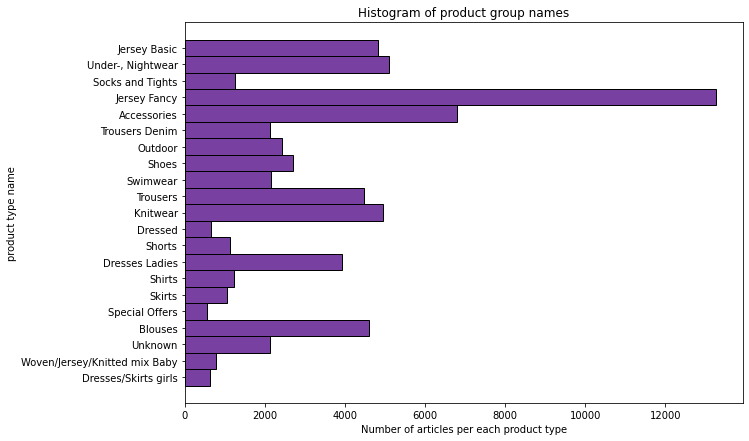

In [ ]:
# Count of different type of garments available in their inventory
f, ax = plt.subplots(figsize = (10,7))
ax = sns.histplot(data=articles_df, y='garment_group_name', color='indigo')
ax.set_xlabel('Number of articles per each product type')
ax.set_ylabel('product type name')
plt.title("Histogram of product group names")
plt.show()

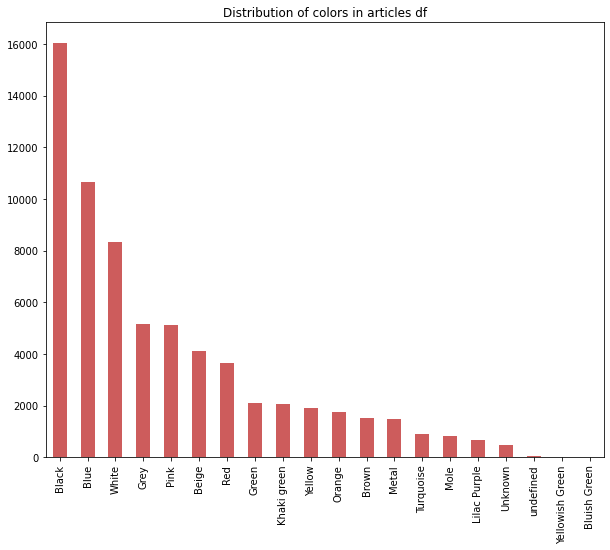

In [ ]:
plt.figure(figsize=(10,8))
articles_df["perceived_colour_master_name"].value_counts().plot.bar(title='Distribution of colors in articles df',color="indianred",grid=False)
plt.show()

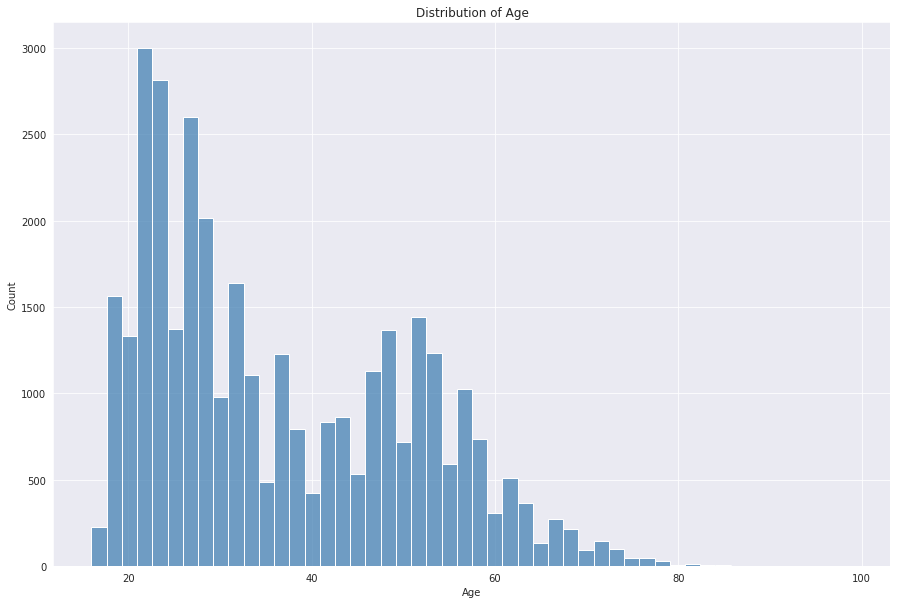

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=customers_df, x='age', bins=50, color='steelblue')
plt.title("Distribution of Age")
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Count of transactions made per year')

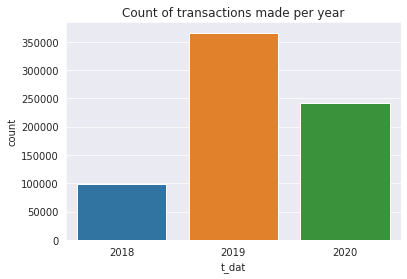

In [ ]:
# Plot to determine the transactions made each year
sns.countplot(x=transactions_df['t_dat'].dt.year)
plt.title("Count of transactions made per year")

Text(0.5, 1.0, 'Monthly count of transactions in descending order')

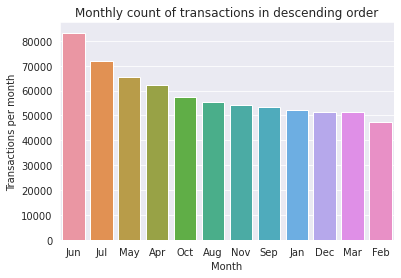

In [ ]:
# Plot to know monthly count of transactions
monthly_count={}
months={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
for index,values in zip(transactions_df['t_dat'].dt.month.value_counts().index,transactions_df['t_dat'].dt.month.value_counts().values):
  monthly_count[months[index]]=values

plt.xlabel("Month")
plt.ylabel("Transactions per month")
sns.barplot(y=list(monthly_count.values()), x=list(monthly_count.keys()))
plt.title("Monthly count of transactions in descending order")

Text(0.5, 1.0, 'Day of the week transactions in descending order')

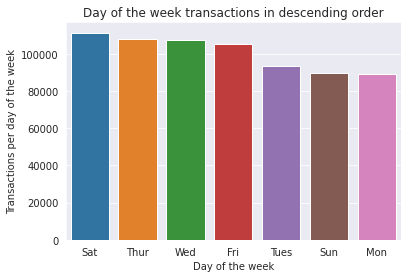

In [ ]:
# Plot to get transactions per week of the day
weekly_count={}
weeks={0:"Mon",1:"Tues",2:"Wed",3:"Thur",4:"Fri",5:"Sat",6:"Sun"}
for index,values in zip(transactions_df['t_dat'].dt.dayofweek.value_counts().index,transactions_df['t_dat'].dt.dayofweek.value_counts().values):
  weekly_count[weeks[index]]=values

plt.xlabel("Day of the week")
plt.ylabel("Transactions per day of the week")
sns.barplot(y=list(weekly_count.values()), x=list(weekly_count.keys()))
plt.title("Day of the week transactions in descending order")

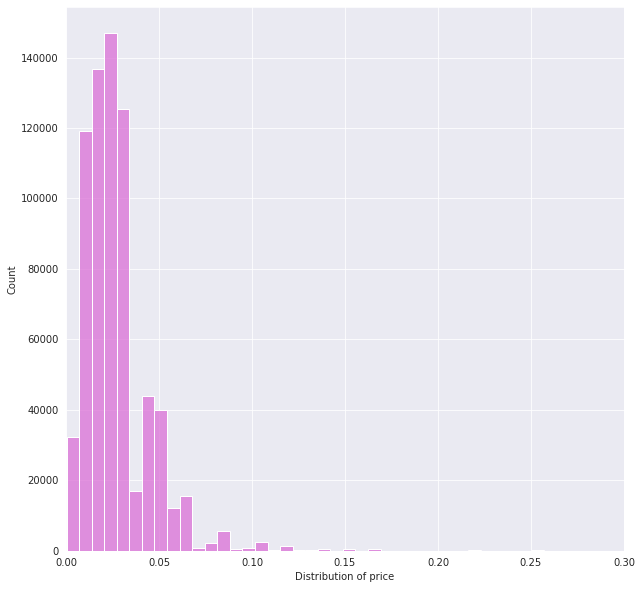

In [ ]:
f, ax = plt.subplots(figsize = (10, 10))
plt.xlim(0, 0.3)
ax = sns.histplot(data = transactions_df, x = 'price', bins = 75, color = 'orchid')
ax.set_xlabel('Distribution of price')
plt.show()

## Multivariate analysis

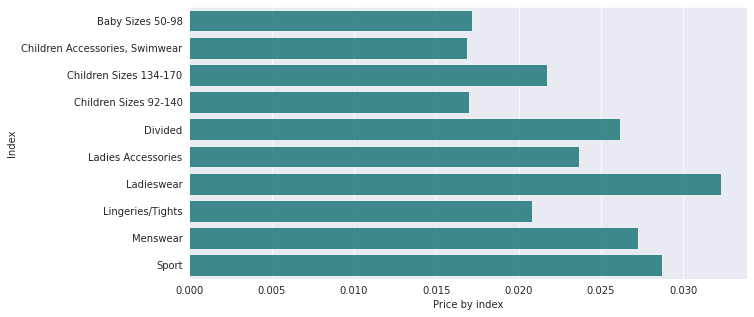

In [ ]:
# Price by categories

articles_index = articles_with_trans[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='teal', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

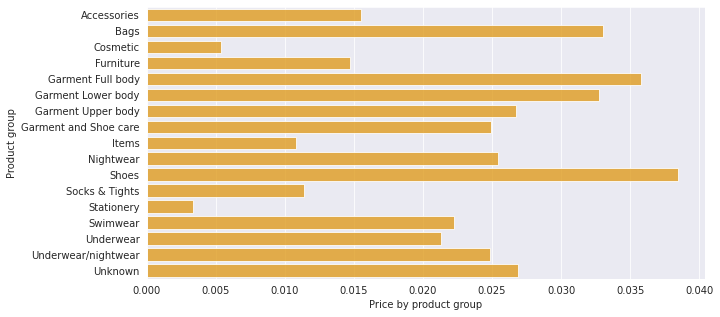

In [ ]:
# Distribution of product group by their prices.

articles_index = articles_with_trans[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

[Text(0, 0, '22253'), Text(0, 0, '12028'), Text(0, 0, '19')]

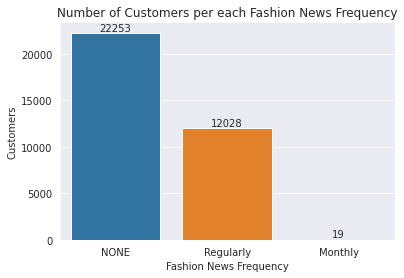

In [ ]:
temp = customers_df.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)

plt.title(f'Number of Customers per each Fashion News Frequency')

s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)

locs, labels = plt.xticks()

s.bar_label(s.containers[0])

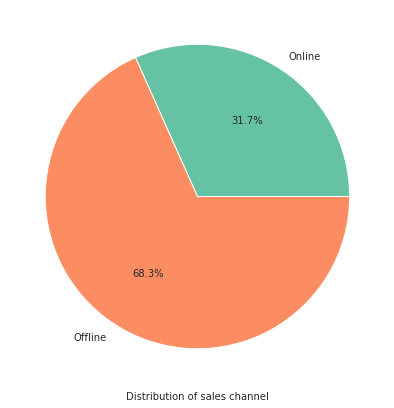

In [ ]:
pie_data = transactions_df.groupby('sales_channel_id').count()['customer_id']

f, ax = plt.subplots(figsize = (10, 7))
colors = sns.color_palette('Set2')
ax.pie(pie_data, labels=['Online', 'Offline'], colors = colors,autopct='%2.1f%%')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of sales channel')
plt.show()

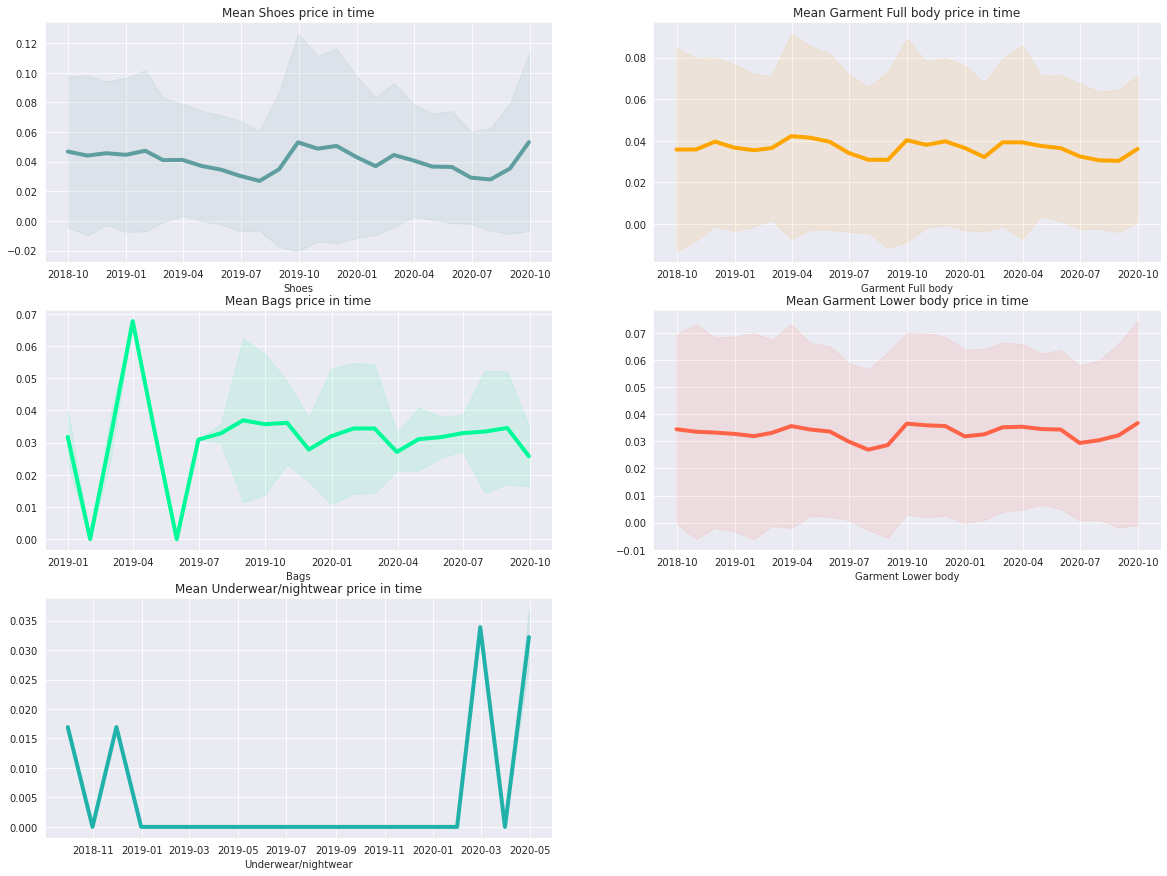

In [ ]:
# The change of mean prices with date for the top 5 costly products

articles_with_trans['t_dat'] = pd.to_datetime(articles_with_trans['t_dat'])
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_with_trans_product = articles_with_trans[articles_with_trans.product_group_name == product_list[k]]
            series_mean = articles_with_trans_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_with_trans_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()


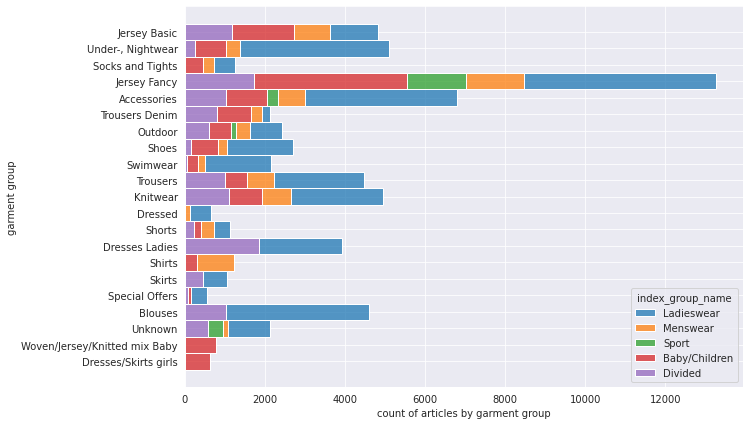

In [ ]:
# Count of articles per garment group using index_group_name as hue
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.histplot(data=articles_df, y='garment_group_name', hue='index_group_name', multiple="stack")
ax.set_xlabel('count of articles by garment group')
ax.set_ylabel('garment group')
plt.show()

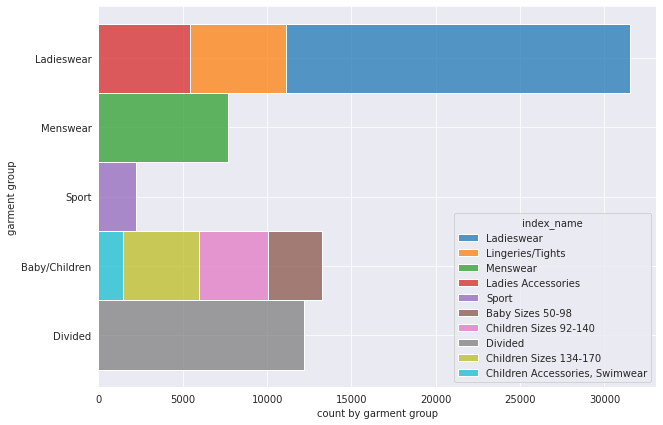

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.histplot(data=articles_df, y='index_group_name', hue='index_name', multiple="stack",stat="count")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()